<a href="https://colab.research.google.com/github/dhruvnasit0603/DS220-Final-Project-2/blob/main/DS220_Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Introduction about the dataset: this dataset is of people having insurance and it cointains various columns storing different types of data of a particular individual. I will use the word 'benificiary' to refer to each individual in this dataset.

Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex :- This is the policy holder's gender, either male or female.

BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.

Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.

Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

Charges​ :- Individual medical costs billed to health insurance

Total Rows - 1338

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.

Question to be answered:
1. How do insurance charges vary by age group?
2. Is there a significant difference in insurance charges between males and females?
3. How does BMI (Body Mass Index) influence insurance charges?
4. Is there a relationship between the number of children and insurance charges?
5. Do smokers pay higher insurance charges than non-smokers?
6. How do insurance charges differ across regions?
7. Among smokers, does BMI significantly affect insurance charges?
8. Is there a correlation between the number of children and the BMI of the policyholder?
9. What is the age distribution among smokers and non-smokers?
10. Can we predict insurance charges based on age, BMI, and smoking status?

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-3-dcc305bf4101>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_charges = data.groupby('age_group')['charges'].mean()


Average insurance charges by age group:
age_group
18-30     9822.837599
31-40    11639.308653
41-50    14782.043077
51-60    17062.292763
61-70    21063.163398
Name: charges, dtype: float64


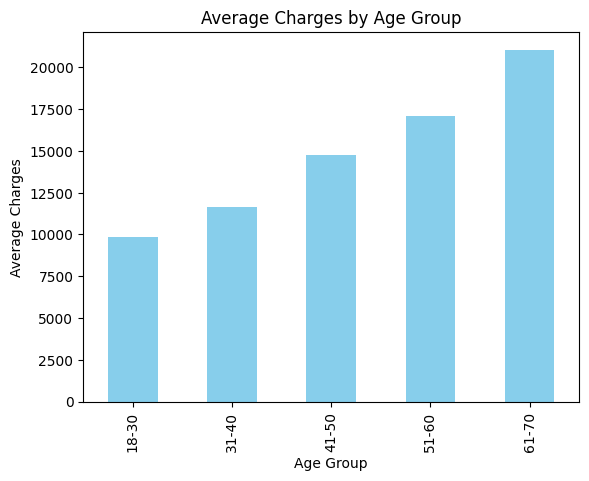

In [3]:
# Question 1: How do insurance charges vary by age group?
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])
age_group_charges = data.groupby('age_group')['charges'].mean()
print("Average insurance charges by age group:")
print(age_group_charges)
age_group_charges.plot(kind='bar', title='Average Charges by Age Group', xlabel='Age Group', ylabel='Average Charges', color='skyblue')
plt.show()

Average insurance charges by gender:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


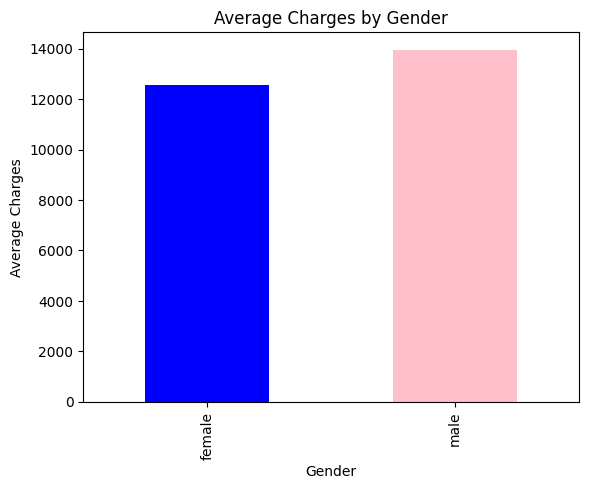

In [4]:
# Question 2: Is there a significant difference in insurance charges between males and females?
gender_charges = data.groupby('sex')['charges'].mean()
print("Average insurance charges by gender:")
print(gender_charges)
gender_charges.plot(kind='bar', title='Average Charges by Gender', xlabel='Gender', ylabel='Average Charges', color=['blue', 'pink'])
plt.show()

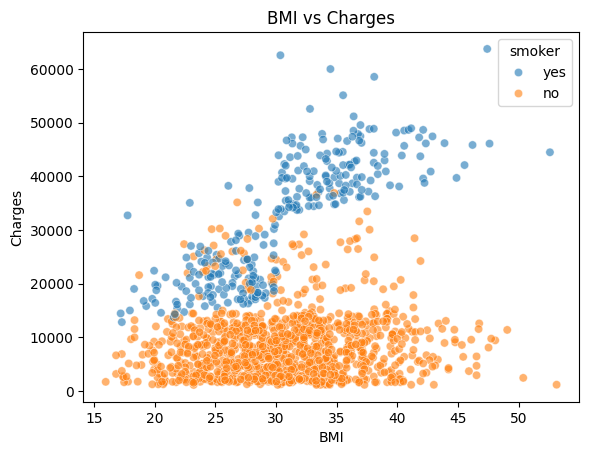

In [ ]:
#Question 3: How does BMI influence insurance charges?
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Average insurance charges by number of children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


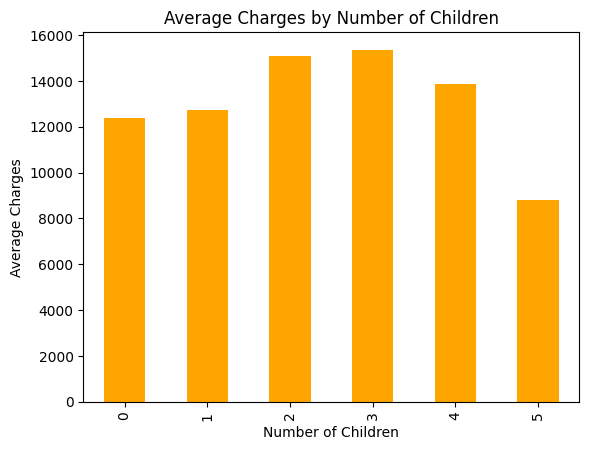

In [ ]:
# Question 4: Is there a relationship between the number of children and insurance charges?
children_charges = data.groupby('children')['charges'].mean()
print("Average insurance charges by number of children:")
print(children_charges)
children_charges.plot(kind='bar', title='Average Charges by Number of Children', xlabel='Number of Children', ylabel='Average Charges', color='orange')
plt.show()

Average insurance charges by smoking status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


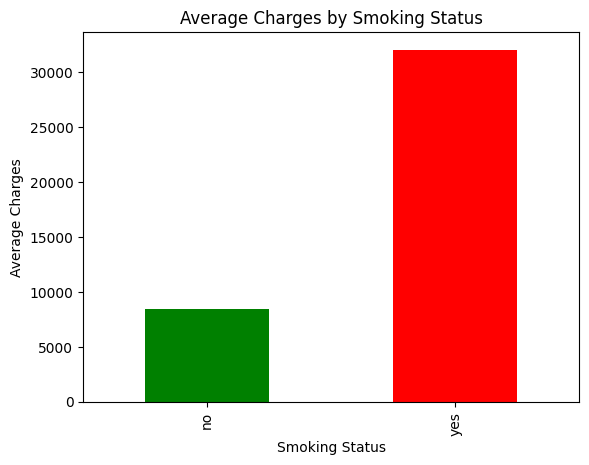

In [ ]:
# Question 5: Do smokers pay higher insurance charges than non-smokers?
smoker_charges = data.groupby('smoker')['charges'].mean()
print("Average insurance charges by smoking status:")
print(smoker_charges)
smoker_charges.plot(kind='bar', title='Average Charges by Smoking Status', xlabel='Smoking Status', ylabel='Average Charges', color=['green', 'red'])
plt.show()

Average insurance charges by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


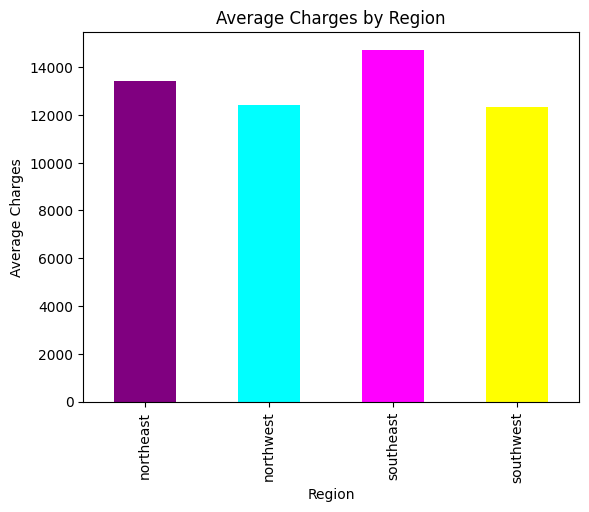

In [ ]:
# Question 6: How do insurance charges differ across regions?
region_charges = data.groupby('region')['charges'].mean()
print("Average insurance charges by region:")
print(region_charges)
region_charges.plot(kind='bar', title='Average Charges by Region', xlabel='Region', ylabel='Average Charges', color=['purple', 'cyan', 'magenta', 'yellow'])
plt.show()

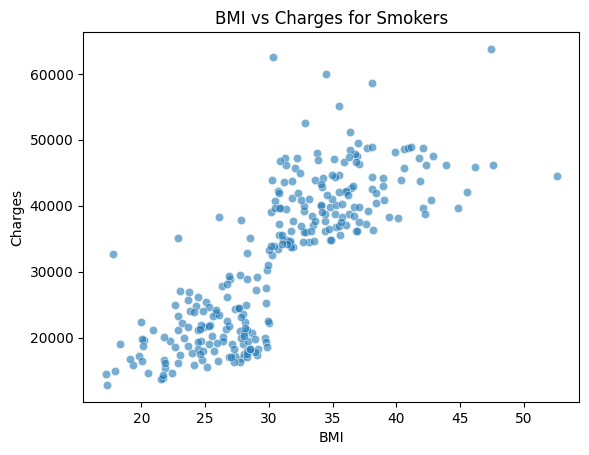

In [ ]:
# Question 7: Among smokers, does BMI significantly affect insurance charges?
smoker_data = data[data['smoker'] == 'yes']
sns.scatterplot(data=smoker_data, x='bmi', y='charges', alpha=0.6)
plt.title('BMI vs Charges for Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [ ]:
# Question 8: Is there a correlation between the number of children and the BMI of the policyholder?
correlation_children_bmi = data['children'].corr(data['bmi'])
print(f"Correlation between number of children and BMI: {correlation_children_bmi}")

Correlation between number of children and BMI: 0.012758900820673817


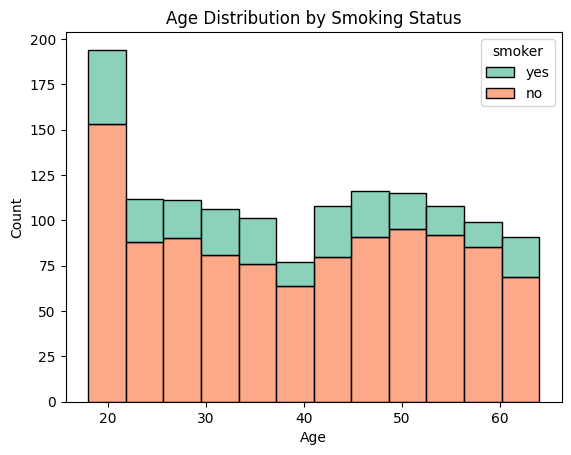

In [ ]:
# Question 9: What is the age distribution among smokers and non-smokers?
sns.histplot(data=data, x='age', hue='smoker', multiple='stack', palette='Set2')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()